In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
def compute_cost_logistic_regression(X, y, w, b, lambda_l = 1):
    '''
    Description: computes the cost for regularized logistic regression
    ( the term with the numerator lambda helps to minimize the size of the parameters 
    (w1, w2,...),
    but I use the version where b is not regularized )
    Preconditions: X - m x n matrix which contains our data 
                    y - m size array - target values
                    w - n size array - model parameters
                    b - real number - free term parameter
                    lambda_l - real number - quantifier for regularization
    Postconditons: total_cost - real number - the cost of our calculations, which will help
    later to build a better model
    '''
    m = X.shape[0] # number of input data examples
    n = X.shape[1] # number of features of each example

    cost = 0.0
    for i in range(m):
        z = np.dot(X[i],w)+b
        z = np.clip( z, -500, 500 )             # bring the data in a more compact range
        f_wb = 1.0/(1.0+ np.exp(-z))            # the formula of logistic regression model
        cost += -y[i] * np.log(f_wb) - (1-y[i]) * np.log(1 - f_wb)
    cost /= m

    # the regularization part
    reg_cost = 0
    for j in range(n):
        reg_cost += w[j]**2
    reg_cost *= lambda_l/(2*m)

    # adding the 2 costs
    total_cost = cost + reg_cost
    return total_cost

In [3]:
def compute_gradient(X, y, w, b, lambda_l):
    '''
    Description: computes the partial derivative of the w vector and b scalar used in the gradient descent algorithm 
    Preconditions: X - m x n matrix which contains our data 
                    y - m size array - target values
                    w - n size array - model parameters
                    b - real number - free term parameter
                    lambda_l - real number - quantifier for regularization
    Postconditons: dj_dw - n array (size of w) and dj_db - scalar
    '''
    m = X.shape[0]
    n = X.shape[1]

    dj_dw= np.zeros((n,))    # null vector of n size
    dj_db = 0.0

    for i in range(m):
        z = np.dot(X[i],w)+b
        z = np.clip( z, -500, 500 )             # bring the data in a more compact range
        f_wb = 1.0/(1.0+ np.exp(-z))
        dj_db += f_wb - y[i] # forming the derivative of b 

       # forming the gradient of w - unregularized part for now
        for j in range(n):
            dj_dw[j] += (f_wb - y[i])*X[i,j]

    dj_dw /= m
    dj_db /= m

    #now add the regularization part for the w feature vector
    for j in range(n):
        dj_dw[j] += (lambda_l/m) * w[j]

    return dj_db, dj_dw

In [4]:
# apply z-score normalization to bring our input data in the same range, so our model will perform faster and better

def zscore_normalize_features(X): 
    # description: computes  X, zcore normalized by column
    # pre: X - mxn array
    # post: X_norm : normalized data 

    # find the mean of each feature, by columns
    mu = np.mean(X, axis = 0) # nD array
    # find the standard deviation of each column
    sigma = np.std(X, axis=0) # nD array
    # apply the formula of the z-score normalization
    X_norm = (X - mu) / sigma      

    return X_norm

In [18]:
# this is where FOOD INPUT DATA is taken as input

'''
We have 25 examples of healthy and unhealthy foods.
As target values, we have the classes healthy/unhealthy, marked with 1(healthy)/0(unhealthy)       - OUTPUT
Each food has 5 features (measured in 100g or ml):  
 - Total Fat (g)
 - Saturated Fat (g)
 - Carbohydrates (g)                                                            - INPUT
 - Total Sugars (g) 
 - Protein (g)
 '''
food_data = pd.read_csv('food_data.csv') # load data from file
X = np.empty((0, 5), dtype=float)                     # empty array prepared for adding 5 features on each row
y = np.array([], dtype=int)              # we only have 0 and 1 , which are integers
for i in range(3):  # 25 finally
    input_i = np.array(food_data.iloc[i][1:6], dtype=float)
    target_i = food_data.iloc[i,6]                           # capture input & output values
    input_i = input_i.reshape(1, 5)  # reshape row_i to be a 2D array with 1 row 5 col (eg. [[1,2,3,4,5]] )
    X = np.append(X, input_i, axis=0)  # append along axis 0 (rows)
    y = np.append(y, target_i)
    
X_norm = zscore_normalize_features(X)
print(y)
print(X)



[0 1 0]
[[ 0.5   0.1   4.9   4.9   0.5 ]
 [ 3.1   0.43 47.5   0.53  8.7 ]
 [11.    3.   14.    1.    1.  ]]


In [19]:
def gradient_descent(X, y, w, b, compute_cost_logistic_regression, compute_gradient, alpha, iterations):
    '''
    Descriptions: performs batch gradient descent to learn w vector and b parameter, using learning rate alpha and number of iterations
    Preconditions: X - m x n matrix which contains our data 
                    y - m size array - target values
                    w - n size array - model parameters
                    b - real number - free term parameter
                    compute_cost_linear_regression, compute_gradient : functions to compute cost & gradient
                    alpha : learning rate
                    iterations: number of iterations
    Postconditons: w , b - updated values of parameters of the model & hist - array to store cost and w at every iteration
    '''
    hist = []
    for i in range(iterations):
        # calculate gradient for our parameters
        dj_db, dj_dw = compute_gradient(X, y, w, b,0.7)

        # update parameters using the learning rate
        w -= alpha* dj_dw
        b -= alpha* dj_db

        # save cost at every iteration if we do not have too many iterations (avoid resource exhaustion)
        if i<100000:
            hist.append(compute_cost_logistic_regression(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(iterations/ 10) == 0:
            print(f"Iteration {i:4d}: Cost {hist[-1]:8.2f}   ")

    return w, b, hist

In [20]:
w_in= np.zeros((X_norm.shape[1],)) # initialize the parameters with default values null vector and 0
b_in= 0

iterations=1000  # these values may variate, but we sould try different values to make the model as accurate as possible
alpha=0.01


w,b,cost_history=gradient_descent(X_norm, y, w_in, b_in, compute_cost_logistic_regression, compute_gradient, alpha, iterations) 
#here we save all the values that we need later of aproximate values with new inputs

print("w,b found by gradient descent:", w, b)
print(cost_history)

Iteration    0: Cost     0.69   
Iteration  100: Cost     0.41   
Iteration  200: Cost     0.36   
Iteration  300: Cost     0.34   
Iteration  400: Cost     0.34   
Iteration  500: Cost     0.34   
Iteration  600: Cost     0.33   
Iteration  700: Cost     0.33   
Iteration  800: Cost     0.33   
Iteration  900: Cost     0.33   
w,b found by gradient descent: [-0.1874327  -0.26692465  0.61240596 -0.355787    0.62634252] -0.7193849350901343
[0.6872541947693326, 0.6814653466775906, 0.6757787944644528, 0.6701927230717163, 0.6647053442084835, 0.6593148963315654, 0.6540196446023131, 0.6488178808211122, 0.6437079233407593, 0.6386881169599095, 0.6337568327977584, 0.6289124681510941, 0.6241534463348196, 0.6194782165070186, 0.6148852534796052, 0.6103730575155608, 0.6059401541137298, 0.6015850937821139, 0.5973064518005654, 0.5931028279737476, 0.5889728463752, 0.5849151550833014, 0.5809284259099013, 0.577011354122349, 0.5731626581596226, 0.5693810793432158, 0.5656653815834273, 0.5620143510816479, 

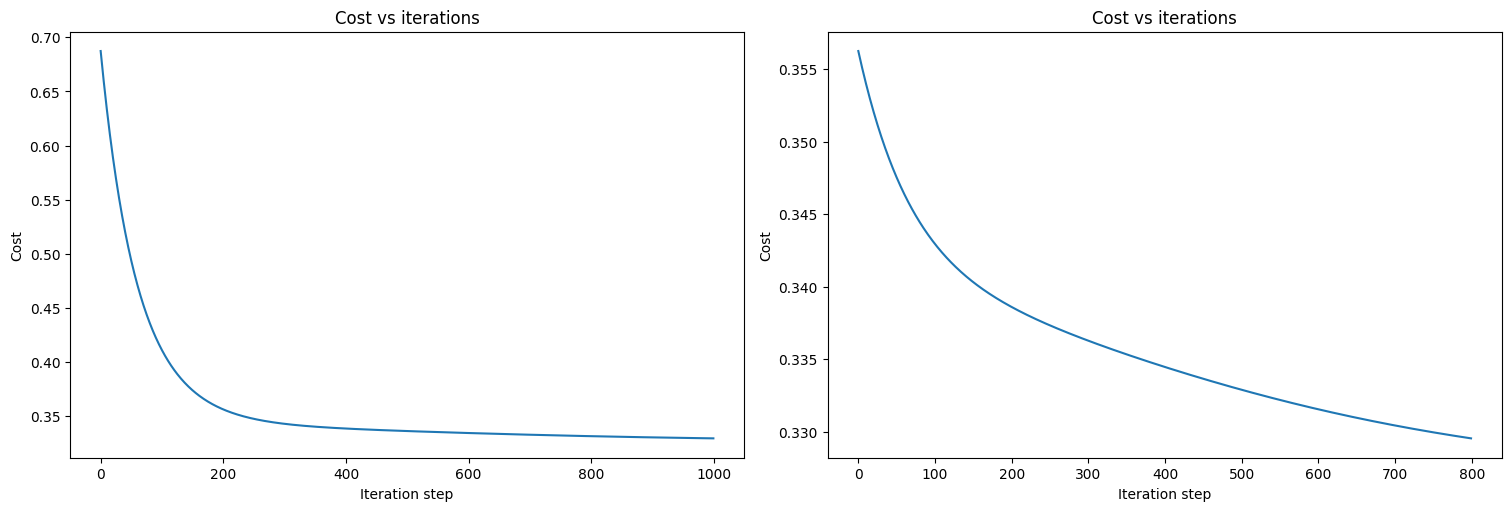

In [21]:
# form the output given by our predictions of w and b

# plot the cost resulted, which is in our cost hist array

fig, (ax1, ax2) = plt.subplots(1,2, constrained_layout=True, figsize=(15,5)) # create 2 pictures in the same row to show how fast does the cost decrease
ax1.plot(cost_history)
ax1.set_title("Cost vs iterations")
ax1.set_xlabel("Iteration step")
ax1.set_ylabel("Cost")

ax2.plot(np.arange(len(cost_history[200:])), cost_history[200:])
ax2.set_title("Cost vs iterations")
ax2.set_xlabel("Iteration step")
ax2.set_ylabel("Cost")

plt.show()

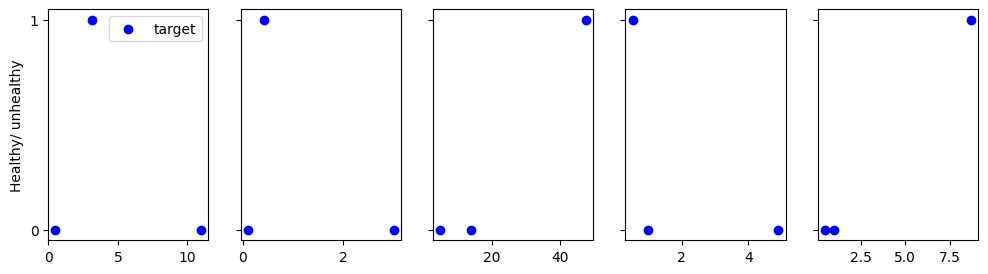

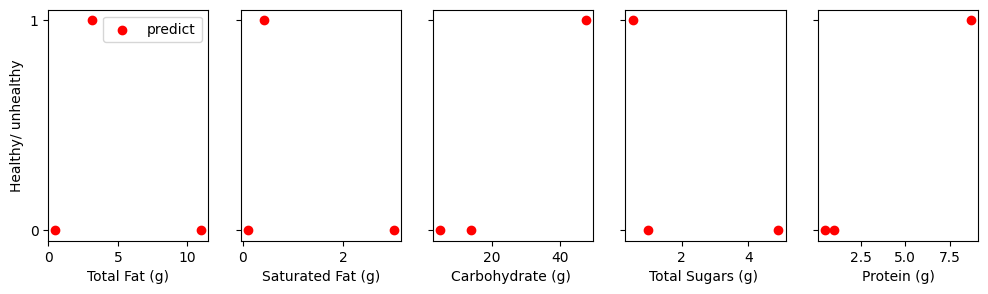

In [22]:
# prepare the predicted output for plotting
m = X_norm.shape[0]
yp = np.zeros(m)

# predict the output using the sigmoid function using w and b found before
for i in range(m):
  z = np.dot(X_norm[i],w)+b
  z = np.clip( z, -500, 500 )             # bring the data in a more compact range
  yp[i] = 1.0/(1.0+ np.exp(-z))

# transform the predicted output into boolean array to help us plot according to the value of every element
# if it is >= 0.5, we would consider that we are in a true (1 or healthy) situation, else it is the 0 or false case
yp = (yp >= 0.5)

X_features=["Total Fat (g)", "Saturated Fat (g)", "Carbohydrate (g) ", "Total Sugars (g) ", "Protein (g)"]
# plot predict

#structure the plot into 2 rows with n (nr features) columns
fig1, ax1 = plt.subplots(1,X.shape[1], figsize=(12,3), sharey=True)
fig2, ax2 = plt.subplots(1,X.shape[1], figsize=(12,3), sharey=True)


for i in range(len(ax1)):
  ax1[i].scatter( X[:,i], y, color="blue", label= 'target')
  ax2[i].scatter( X[:,i], yp, color='red', label='predict')  # plot every feature target and predction to compare them
  ax2[i].set_xlabel(X_features[i])

y_ticks = [0, 1]
ax1[0].set_yticks(y_ticks)  # set y-ticks for the first row   - only 0 and 1 ( CLASSIFICATION CLASSES )
ax2[0].set_yticks(y_ticks)  # set y-ticks for the second row

ax1[0].set_ylabel("Healthy/ unhealthy")
ax2[0].set_ylabel("Healthy/ unhealthy")
ax1[0].legend()
ax2[0].legend()

plt.show()